In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Task1. Create a .CSV file that includes all of the information shown above. You are required to use a "wide" structure similar to how the information appears above, so that you can practice both data tidying and the data wrangling transformations described in Chapter 8 of the "Python for Data Analysis" textbook. Load your .CSV file into your GitHub repository.

In [306]:
filename = "https://raw.githubusercontent.com/mhan1/DAV-5400/master/week9.csv"

In [307]:
df = pd.read_csv(filename)

In [308]:
df

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


- Task1. I loaded my "week9.csv" file into my GitHub repository and read on the Jupyter Notebook as above.

## Task2. Read your .CSV filr from your GitHub Repository into a Jupyter Notebook, and use your knowledge of combining and reshaping data in Pandas to tidy and transform your data. Your reshaping/transformational steps must include converting the above table to a "tidy" long format. Additional transformational steps (e.g., filling in missing data values, renaming, columns, etc.) should be performed as needed to ensure that your data is, in fact, "tidy".

In [309]:
# sanity check
df

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


- I am dropping the third row (index 2) which has null values and convert it into pandas dataframe.

In [310]:
df = df.drop([2])

In [311]:
df = pd.DataFrame(df)

In [312]:
#sanity check
df

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [313]:
df['Los Angeles']

0    497.0
1     62.0
3    694.0
4    117.0
Name: Los Angeles, dtype: float64

In [314]:
tidy1 = pd.DataFrame(df)

In [315]:
tidy1

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [316]:
tidy1.columns = pd.Index(['Airlines', 'Arrival', 'Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle'])

In [317]:
tidy1

,Airlines,Arrival,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [318]:
#Replacing the first NaN element with 'ALASKA'.
tidy2 = tidy1.fillna(value='ALASKA', limit=1)

In [319]:
tidy2

,Airlines,Arrival,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [322]:
#Replacing the first NaN element with 'AM WEST'
tidy3 = tidy2.fillna(value='AM WEST', limit=1)

In [323]:
tidy3

,Airlines,Arrival,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


In [338]:
#Converting the table to Long format using 'Airlines' and 'Arrival' as the keys and others as data values
tidy4 = tidy3.melt(id_vars = ['Airlines', 'Arrival'], value_vars = ['Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle'])

In [339]:
tidy4

,Airlines,Arrival,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


In [340]:
#renaming the column
tidy4.rename(columns={"variable":"City"}, inplace=True)
tidy4

,Airlines,Arrival,City,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


- The data is now "tidy" format.
- Each row is a single observation, that is, each destination has the number of either on-time or delayed arrival by each airline.
- This 'tidy' data can now be used to answer the analytical questions.

## Task3. Compare the arrival delays for the two airlines. Some questions to answer: For each city, which airline had the best on time performance?; Which airline had the best overall on time performance?

In [349]:
tidy4

,Airlines,Arrival,City,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


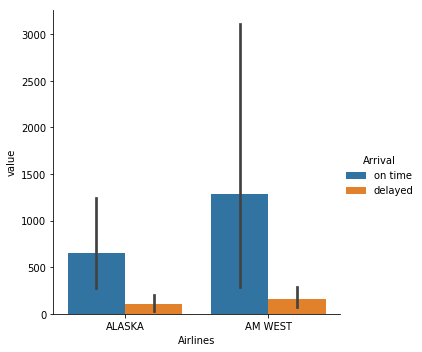

In [356]:
sns.catplot(x='Airlines', y='value', hue='Arrival', kind='bar', data=tidy4)

- Based on the above bar chart, AM WEST airline has more "on-time" arrival
than ALASKA airline. Even though AM WEST has a little more "delayed" arrival, the difference between them are much smaller than the difference between the "on-time" arrival frequencies. Hence, I can conclude that AM WEST has better performance in terms of arrival time.

## Task4. Provide an example of your recommendation of presentation.

- I recommend the wide format for the presentatino purpose to understand easily.